<h1 align='center'>K-Means clustering (Phân cụm K-Means)</h1>

# 1. Giới thiệu về K-Means clustering
Phân cụm là kỹ thuật rất quan trọng trong khai phá dữ liệu, nó thuộc lớp các phương pháp Unsupervised Learning trong Machine Learning. Nó được định nghĩa là các qui trình tìm cách nhóm các đối tượng đã cho vào các cụm (clusters), sao cho các đối tượng trong cùng 1 cụm tương tự (similar) nhau và các đối tượng khác cụm thì không tương tự (Dissimilar) nhau.

Mục đích của phân cụm là tìm ra bản chất bên trong các nhóm của dữ liệu. Các thuật toán phân cụm (Clustering Algorithms) đều sinh ra các cụm (clusters). Tuy nhiên, không có tiêu chí nào là được xem là tốt nhất để đánh hiệu của của phân tích phân cụm, điều này phụ thuộc vào mục đích của phân cụm như: data reduction, “natural clusters”, “useful” clusters, outlier detection

Kỹ thuật phân cụm có thể áp dụng trong rất nhiều lĩnh vực như:
* Thông tin nhân khẩu học: đánh giá giới tính, tuổi tác, tình trạng hôn nhân, nghề nghiệp:
* Thông tin về mặt địa lý: đánh giá thông tin tại các địa phương, phục vụ cho các doanh nghiệp mở của hoạt động trao đổi tại địa điểm đó.
* Tâm lý học: đánh giá tầng lớp xã hội, thói quen chi tiêu, mức độ tiêu thụ sản phẩm/dịch vụ, mong muốn và lợi ích.

In [78]:
# https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
# https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c

import pandas as pd

import numpy as np
from numpy import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

import seaborn as sns
plt.style.use('fivethirtyeight')

from matplotlib import style
style.use('ggplot')

# 1.1. Nạp và đánh giá sơ bộ dữ liệu đầu vào

## 1.1.1 Về bộ dữ liệu được cung cấp:
Mua sắm cá nhân còn gọi là đi chợ (siêu thị,...) hay mua đồ là các hoạt động lựa chọn và mua hàng hóa trực tiếp tại các điểm bán lẻ, đây không chỉ là một hoạt động mua bán đơn thuần mà còn là hoạt động giải trí. Mua sắm thường được thực hiện ở các địa điểm cố định (tại các cửa hàng, các cửa hàng bách hóa, tiệm tạp hóa hoặc chợ, siêu thị...), các mặt hàng mua sắm thường là những mặt hàng gia dụng, thẩm mỹ,...vv

Bộ dữ liệu dưới đây là thông tin mua sắm của 200 khách hàng tại một siêu thị được cung cấp thông qua thẻ khách hàng thân thiết. Bộ dữ liệu này cung cấp cho ta 5 trường dữ liệu sau: 
1. ID khách hàng: **Customer ID**
2. Giới tính (0 = nữ, 1 = nam): **Gender**
3. Tuổi: **Age**
4. Thu nhập hàng năm: **Annual Income (k$)**
5. Điểm chi tiêu: **Spending Score (1-100)**

In [79]:
# load dataset
dataset = pd.read_csv('../ds/kmeans-customer/Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 1.1.2 Đánh giá sơ bộ về dataset được cung cấp:
Bộ dữ liệu cung cấp đươc chiếm đa số bởi nữ giới: 0.44 </br>
Độ tuổi trung bình rơi vào 39 tuổi trong đó
* 25%: 29 tuổi
* 50%: 36 tuổi
* 75%: 49 tuổi
Số chi tiêu trung bình rơi vào 

In [80]:
dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


## 1.2 Thuật toán K-Means thực hiện qua các bước chính sau:
1. Chọn ngẫu nhiên K tâm (centroid) cho K cụm (cluster). Mỗi cụm được đại diện bằng các tâm của cụm.
2. Tính khoảng cách giữa các đối tượng (objects) đến K tâm (thường dùng khoảng cách Euclidean)
3. Nhóm các đối tượng vào nhóm gần nhất
4. Xác định lại tâm mới cho các nhóm
5. Thực hiện lại bước 2 cho đến khi không có sự thay đổi nhóm nào của các đối tượng

Mô tả lại bưới 2-5 thông qua công thức: </br>
Lặp lại cho tới khi hội tụ: { </br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Với mỗi i: </br>

$$ c^i\text{:=}\arg  \underset{j}{\min }\|x^i-\mu _j\|^2 $$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Với mỗi j: </br>

$$ \mu _j\text{:=}\frac{\sum _{i=1}^m x^i \left\{c^i=j\right\}}{\sum _{i=1}^m 1 \left\{c^i=j\right\}} $$
}



In [81]:
# https://towardsdatascience.com/k-means-clustering-implementation-2018-ac5cd1e51d0a
# https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
class KMeans ():
    def __init__(self, X, clusters, seed, iterations=300):
        random.seed(seed)

        self.K = clusters
        self.X = X
        self.iterations = iterations
        self.features = X.shape[1]
        self.data_size = X.shape[0]

    def initRandomCentroids(self, X):
        centroids = np.zeros((self.K, self.features))
        for k in range(self.K):
            centroid = X[np.random.choice(range(self.data_size))]
            centroids[k] = centroid
        return centroids

    def intClusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters

    def calculateNewCentroids(self, clusters, X):
        centroids = np.zeros((self.K, self.features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def predictCluster(self, clusters, X):
        y_pred = np.zeros(self.data_size)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def labledData(self, X, y_pred):
        labeled_data = {}
        X_list = X.tolist()
        for i in range(y_pred.size):
            if y_pred[i] not in labeled_data:
                labeled_data[y_pred[i]] = [X_list[i]]
            else:
                labeled_data[y_pred[i]].append(X_list[i])

        for key in labeled_data:
            np_labled_data = labeled_data[key]
        return labeled_data

    # fit
    def fit(self):
        centroids = self.initRandomCentroids(self.X)

        for it in range(self.iterations):
            clusters = self.intClusters (self.X, centroids)

            previous_centroids = centroids
            centroids = self.calculateNewCentroids(clusters, self.X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predictCluster(clusters, self.X)

        # Get labeled data
        labeled_data = self.labledData(self.X, y_pred)

        wcss=0
        for k in range(self.K):
            wcss+=np.sum((np.array(labeled_data[k])-centroids[k])**2)

        return y_pred, centroids, wcss

In [82]:
def plotEbow(X, K, seed):
    wcss_array = []
    for k in range(1, K):
        y, centroids, wcss = KMeans(X, k, seed).fit()
        wcss_array = np.append(wcss_array, wcss)

    plt.plot(np.arange(1, K), wcss_array)
    plt.xlabel('Number of Clusters')
    plt.ylabel('within-cluster sums of squares (WCSS)')
    plt.title('Elbow method to determine optimum number of clusters')
    plt.show()

# 2. Đánh giá số lượng features để phân cụm bằng Within Sum Square:
WCSS là phương pháp đánh giá khoảng cách trung bình của cụm tới trung tâm cụm đó. Để tính ra WCSS trước tiên ta cần tính ra khoảng cách Euclidean giữa từng điểm trong phân cụm tới tâm phân cụm đó. Sau khi tính được khoảng cách tất cả điểm trong phân cụm tới tâm phân cụm đó.

$$ \text{WCSS}=\sum _{i\in n} \left(X_i-y_i\right){}^2 $$

Với:
* $Y_i$: là tâm của  $X_i$
* $X_i$: là các điểm trên tập dữ liệu.

Mục đích chính của việt tính WCSS là để **Tối đa hoá số lượng phân cụm** và **Giói hạn số điểm phân cụm tự phát từ dữ liệu**

In [83]:
# Choose your seed
seed=69

Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied


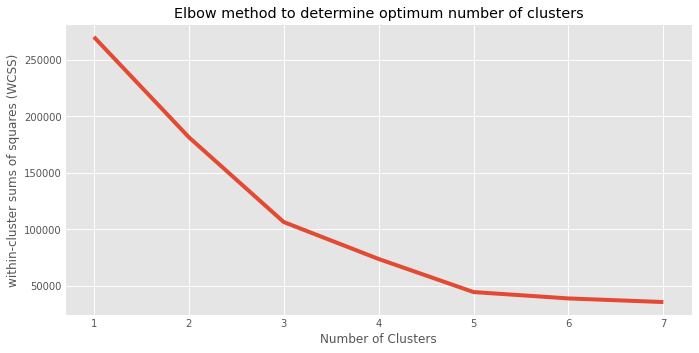

In [84]:
X = dataset.iloc[:, [3, 4]].values
plotEbow(X, 8, seed)

Ở đây a thấy việc sử dung có hay không có features Gender không gây ảnh hưởng việc phân cụm nhóm dữ liệu, vậy nên để cho tối giản ta lựa chọn 3 features chính là <code>Age, Annual Income (k$), Spending Score (1-100)</code>

# 3. Lựa chọn điểm K tối ưu
Within-Cluster Sum of Square (WCSS)

In [85]:
# Cluster and add label to dataset
model =  KMeans(X, 5, seed)
Y, centroids, wcss = model.fit()
Y = Y.astype(int)

dataset['Label'] = Y.tolist()
dataset

Termination criterion satisfied


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15,39,0
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,4
197,198,1,32,126,74,3
198,199,1,32,137,18,4


# 4. Sơ đồ hoá kết quả phân cụm mà thông tin tập dữ liệu và đánh giá
## 4.1 Sơ đồ hoá kết quả phân cụm mà thông tin tập dữ liệu

In [86]:
def plotGroupsStatistics(dataframe, x_name, y_name):
    ax = dataframe.plot.barh(x=x_name, y=y_name)
    ax.bar_label(ax.containers[0])

In [87]:
label_df = dataset[['Label']]
label_df_count = label_df.value_counts().reset_index(name='Count')
label_df_count

,Label,Count
0,1,81
1,3,39
2,4,35
3,0,23
4,2,22


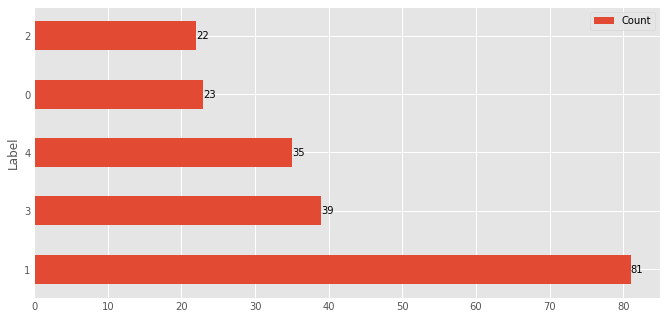

In [88]:
plotGroupsStatistics(label_df_count, 'Label', 'Count')

In [89]:
gender_statistics = dataset.groupby(['Gender', 'Label'])['Gender'].size().reset_index(name='Count')
gender_statistics

,Gender,Label,Count
0,0,0,14
1,0,1,48
2,0,2,13
3,0,3,21
4,0,4,16
5,1,0,9
6,1,1,33
7,1,2,9
8,1,3,18
9,1,4,19


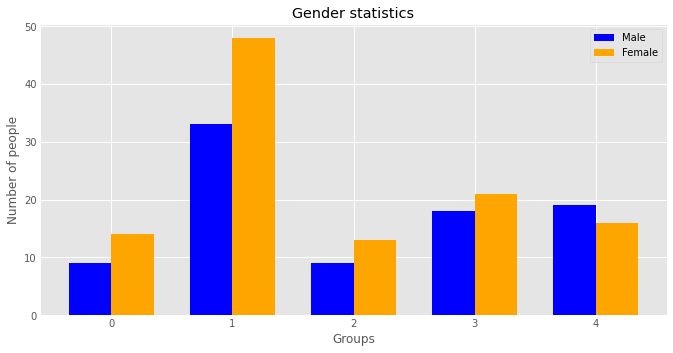

In [90]:
# visual gender per cluster
# !TODO https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

def plotGenderStatistics(dataset):
    data_len_haft = int(len(dataset.index)/2)
    # X value
    label = dataset['Label'].unique().tolist()
    # Y value
    female = dataset['Count'].iloc[:data_len_haft].values
    male = dataset['Count'].iloc[data_len_haft:].values
    # Bar setting
    x = np.arange(len(label))  # the label locations
    width = 0.35  # the width of the bars

    bar1 = plt.bar(x - width/2, male, width, color = 'blue')
    bar2 = plt.bar(x + width/2, female, width, color='orange')

    plt.xlabel('Groups')
    plt.ylabel('Number of people')
    plt.title('Gender statistics')

    plt.legend((bar1, bar2), ('Male', 'Female'))
    plt.show()

plotGenderStatistics(gender_statistics)

## Đánh giá chỉ số trung bình tại mỗi nhóm:

In [91]:
def plotMeanValue(dataframe, x_name, y_name):
    ax = dataframe.plot.bar(x=x_name, y=y_name)
    ax.bar_label(ax.containers[0])

In [92]:
age_df = dataset[['Age','Label']]
age_df_mean = age_df.groupby('Label').mean().reset_index()
age_df_mean

,Label,Age
0,0,45.217391
1,1,42.716049
2,2,25.272727
3,3,32.692308
4,4,41.114286


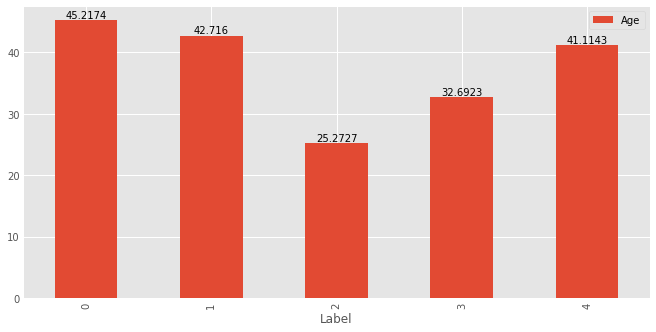

In [93]:
plotMeanValue(age_df_mean, 'Label', 'Age')

In [94]:
income_df = dataset[['Annual Income (k$)','Label']]
income_df_mean = income_df.groupby('Label').mean().reset_index()
income_df_mean

,Label,Annual Income (k$)
0,0,26.304348
1,1,55.296296
2,2,25.727273
3,3,86.538462
4,4,88.200000


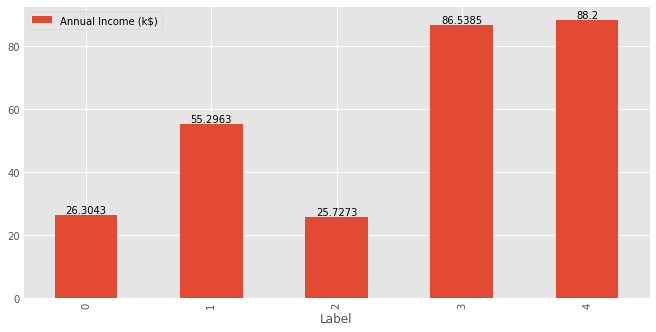

In [95]:
plotMeanValue(income_df_mean, 'Label', 'Annual Income (k$)')

In [96]:
spending_score_df = dataset[['Spending Score (1-100)','Label']]
spending_score_df_mean = spending_score_df.groupby('Label').mean().reset_index()
spending_score_df_mean

,Label,Spending Score (1-100)
0,0,20.913043
1,1,49.518519
2,2,79.363636
3,3,82.128205
4,4,17.114286


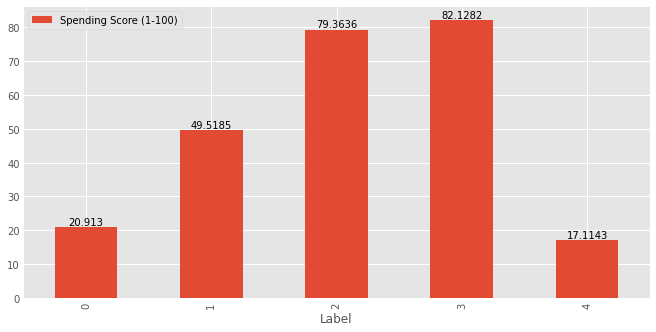

In [97]:
plotMeanValue(spending_score_df_mean, 'Label', 'Spending Score (1-100)')

## Mô tả các Cluster trên biểu đồ

## Phân tích hai biến số giữa **Giới tính** và **Thu nhập thường niên**

### Phân bổ giới tính vơi điểm chi tiêu

D:\Program File\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


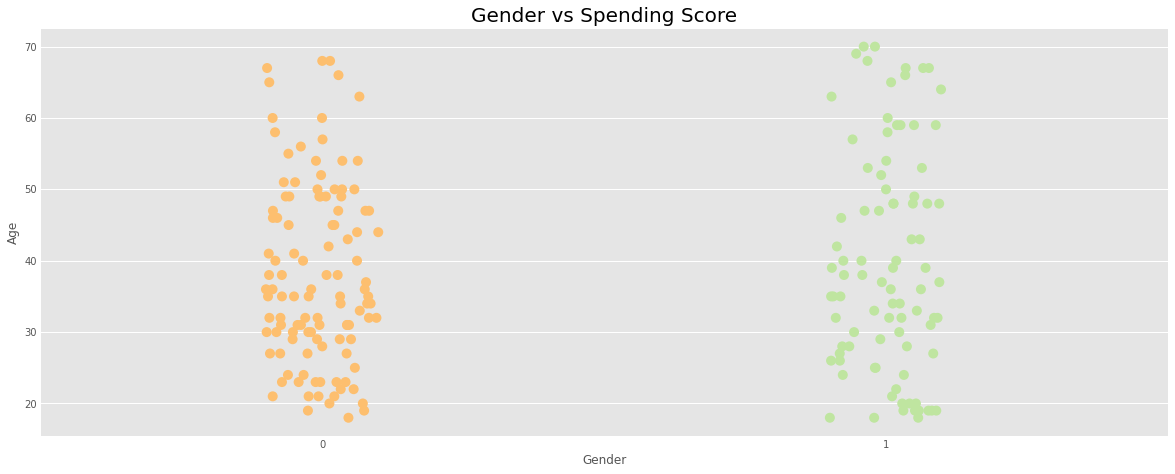

In [98]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(dataset['Gender'], dataset['Age'], palette = 'Spectral', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

D:\Program File\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


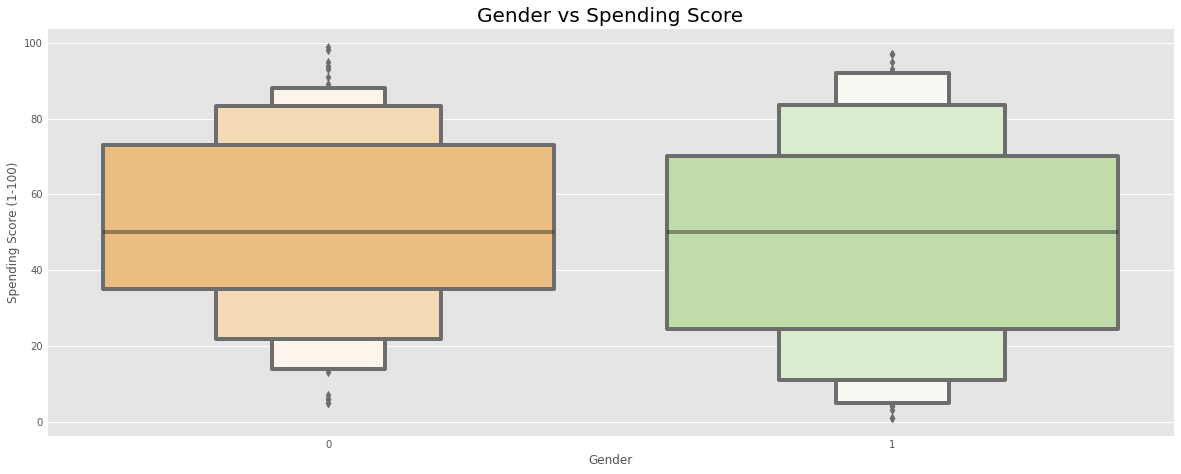

In [99]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(dataset['Gender'], dataset['Spending Score (1-100)'], palette = 'Spectral')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

D:\Program File\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


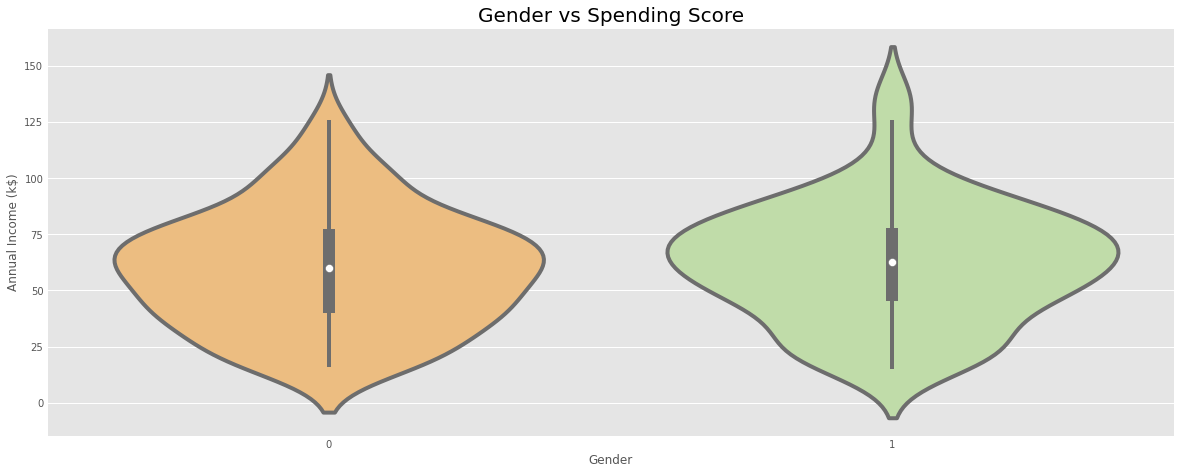

In [100]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(dataset['Gender'], dataset['Annual Income (k$)'], palette = 'Spectral')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

### Phân cụm KMean

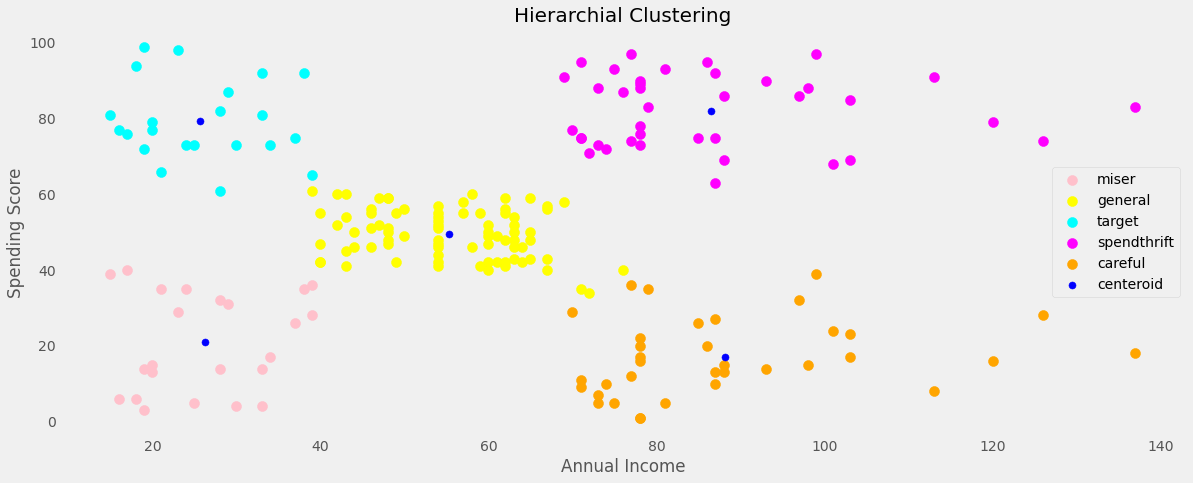

In [104]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(centroids[:,0], centroids[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [102]:
# def clusterVisuallizer(dataset, clusters):
#     fig, ax = plt.subplots(1, figsize=(8,8))
#     # plot data
#     plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
#     # plot centroids
#     plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
#     # plot lines
#     for idx, val in df.iterrows():
#         x = [val.Attack, val.cen_x,]
#         y = [val.Defense, val.cen_y]
#         plt.plot(x, y, c=val.c, alpha=0.2)
#     # legend
#     legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
#                        markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
#     legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
#                 markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
#     legend_elements.extend(cent_leg)
#     plt.legend(handles=legend_elements, loc='upper right', ncol=2)
#     # x and y limits
#     plt.xlim(0,200)
#     plt.ylim(0,200)
#     # title and labels
#     plt.title('Pokemon Stats\n', loc='left', fontsize=22)
#     plt.xlabel('Attack')
#     plt.ylabel('Defense')

In [103]:
# visual cluster
# cluster group https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

# cluster heatmap
# https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set

# sumerizae
# https://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/